In [ ]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving iccmaster_summary (3).csv to iccmaster_summary (3) (1).csv


In [ ]:
data = pd.read_csv('iccmaster_summary (3).csv')
print(data.head())
print(data.describe())
print(data.info())

           id               Match Team Innings  Batting Position  \
0  ODI # 4705  India Vs Australia        India                 1   
1  ODI # 4705  India Vs Australia        India                 2   
2  ODI # 4705  India Vs Australia        India                 3   
3  ODI # 4705  India Vs Australia        India                 4   
4  ODI # 4705  India Vs Australia        India                 5   

   Batsman Name o/n  Runs  Balls  4s  6s  Strike Rate     Winner  \
0  Rohit Sharma   o    47     31   4   3       151.61  Australia   
1  Shubman Gill   o     4      7   0   0        57.14  Australia   
2   Virat Kohli   o    54     63   4   0        85.71  Australia   
3  Shreyas Iyer   o     4      3   1   0       133.33  Australia   
4      KL Rahul   o    66    107   1   0        61.68  Australia   

  VictoryMargin     Ground  
0     6 wickets  Ahmedabad  
1     6 wickets  Ahmedabad  
2     6 wickets  Ahmedabad  
3     6 wickets  Ahmedabad  
4     6 wickets  Ahmedabad  
       B

In [ ]:
# Aggregating batting statistics by match and team
match_level_data = data.groupby(['id', 'Team Innings']).agg(
    total_runs=pd.NamedAgg(column='Runs', aggfunc='sum'),
    average_strike_rate=pd.NamedAgg(column='Strike Rate', aggfunc='mean'),
    total_4s=pd.NamedAgg(column='4s', aggfunc='sum'),
    total_6s=pd.NamedAgg(column='6s', aggfunc='sum'),
    total_balls=pd.NamedAgg(column='Balls', aggfunc='sum'),
    outs=pd.NamedAgg(column='o/n', aggfunc=lambda x: (x=='o').sum())
).reset_index()

# Joining this data back with the match outcome
match_outcomes = data[['id', 'Winner', 'Ground']].drop_duplicates()
full_match_data = pd.merge(match_level_data, match_outcomes, on='id')

# Preview the aggregated data
full_match_data.head()


,id,Team Innings,total_runs,average_strike_rate,total_4s,total_6s,total_balls,outs,Winner,Ground
0,ODI # 1943,Namibia,95,71.025714,9,1,151,5,Zimbabwe,Harare
1,ODI # 1943,Zimbabwe,328,112.320000,32,6,301,2,Zimbabwe,Harare
2,ODI # 1946,Bangladesh,104,41.245455,14,0,168,10,Canada,Durban
3,ODI # 1946,Canada,157,47.211818,17,2,297,8,Canada,Durban
4,ODI # 1947,Kenya,125,33.329091,10,2,232,10,South Africa,Potchefstroom


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Encoding 'Team Innings' and 'Ground' using one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_teams_grounds = encoder.fit_transform(full_match_data[['Team Innings', 'Ground']])

# Create a DataFrame from the encoded features, adding appropriate column names
encoded_df = pd.DataFrame(encoded_teams_grounds, columns=encoder.get_feature_names_out(['Team Innings', 'Ground']))

# Adding the encoded DataFrame back to the main DataFrame
prepared_data = pd.concat([full_match_data.drop(['Ground'], axis=1), encoded_df], axis=1)

# Creating the target variable: 1 if the team won the match, 0 otherwise
prepared_data['is_winner'] = (prepared_data['Winner'] == prepared_data['Team Innings']).astype(int)

# Dropping the 'winner' column as it's now redundant
prepared_data.drop(['Winner','Team Innings'], axis=1, inplace=True)

prepared_data = pd.concat([prepared_data, encoded_df], axis=1)

# Display the first few rows of the prepared dataset
prepared_data.head()


,id,total_runs,average_strike_rate,total_4s,total_6s,total_balls,outs,Team Innings_Afghanistan,Team Innings_Australia,Team Innings_Bangladesh,...,Ground_Pietermaritzburg,Ground_Port of Spain,Ground_Potchefstroom,Ground_Providence,Ground_Pune,Ground_Southampton,Ground_St George's,Ground_Taunton,Ground_Wankhede,Ground_Wellington
0,ODI # 1943,95,71.025714,9,1,151,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ODI # 1943,328,112.320000,32,6,301,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ODI # 1946,104,41.245455,14,0,168,10,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ODI # 1946,157,47.211818,17,2,297,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ODI # 1947,125,33.329091,10,2,232,10,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(prepared_data.columns)

Index(['id', 'total_runs', 'average_strike_rate', 'total_4s', 'total_6s',
       'total_balls', 'outs', 'Team Innings_Afghanistan',
       'Team Innings_Australia', 'Team Innings_Bangladesh',
       ...
       'Ground_Pietermaritzburg', 'Ground_Port of Spain',
       'Ground_Potchefstroom', 'Ground_Providence', 'Ground_Pune',
       'Ground_Southampton', 'Ground_St George's', 'Ground_Taunton',
       'Ground_Wankhede', 'Ground_Wellington'],
      dtype='object', length=146)


Classification Results:

Decision Tree results:
Macro Precision: 66.31%
Macro Recall: 64.74%
Macro F1-Score: 64.62%
Accuracy: 66.20%

Random Forest results:
Macro Precision: 77.66%
Macro Recall: 76.68%
Macro F1-Score: 76.91%
Accuracy: 77.46%

Gradient Boosting results:
Macro Precision: 80.09%
Macro Recall: 80.09%
Macro F1-Score: 80.09%
Accuracy: 80.28%

Best Parameters:
Decision Tree: DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=42)
Random Forest: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=42)
Gradient Boosting: GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=42)

Confusion Matrices:


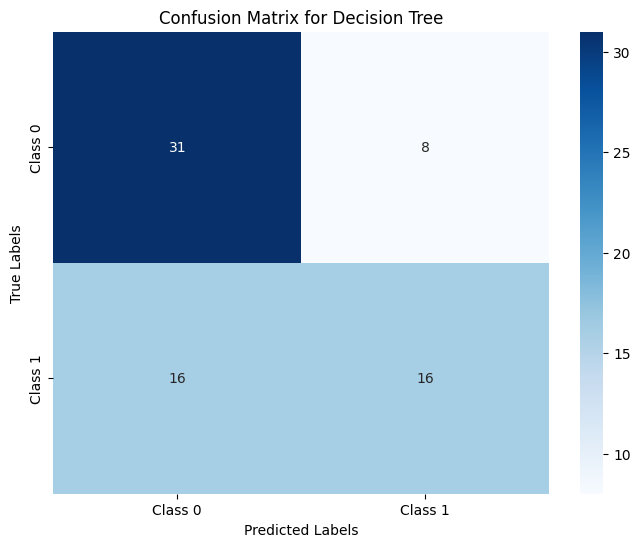

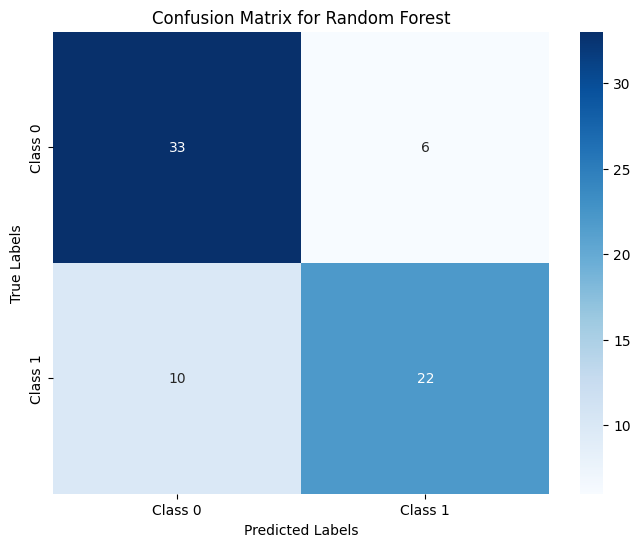

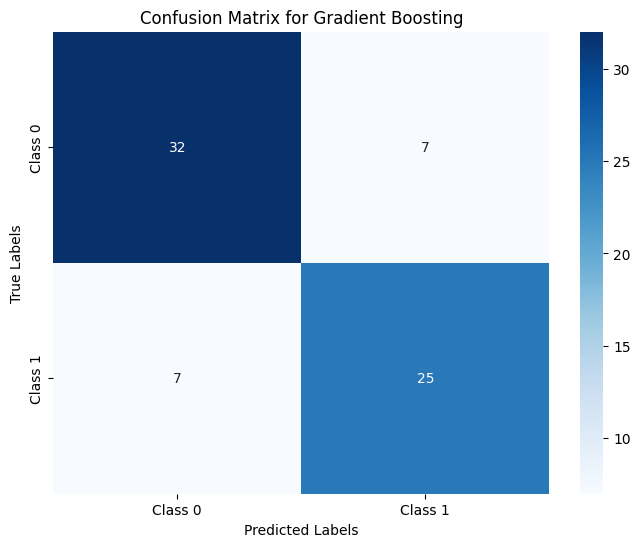

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix




X = prepared_data.drop(['id', 'is_winner'], axis=1)
y = prepared_data['is_winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define models and parameters for GridSearchCV
model_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

results = {}
best_params = {}
confusion_matrices = {}

for model_name, settings in model_params.items():
    grid_search = GridSearchCV(settings['model'], settings['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Store the best parameters
    best_params[model_name] = grid_search.best_params_
    best_params[model_name] = best_model

    # Generate and store the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'Macro Precision': f"{report['macro avg']['precision']:.2%}",
        'Macro Recall': f"{report['macro avg']['recall']:.2%}",
        'Macro F1-Score': f"{report['macro avg']['f1-score']:.2%}",
        'Accuracy': f"{report['accuracy']:.2%}"
    }

    # Store and print the confusion matrix
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

# Print out results
print("Classification Results:")
for model in results:
    print(f"\n{model} results:")
    for metric, value in results[model].items():
        print(f"{metric}: {value}")

print("\nBest Parameters:")
for model in best_params:
    print(f"{model}: {best_params[model]}")

print("\nConfusion Matrices:")
for model, matrix in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Class 0', 'Class 1'],
                 yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



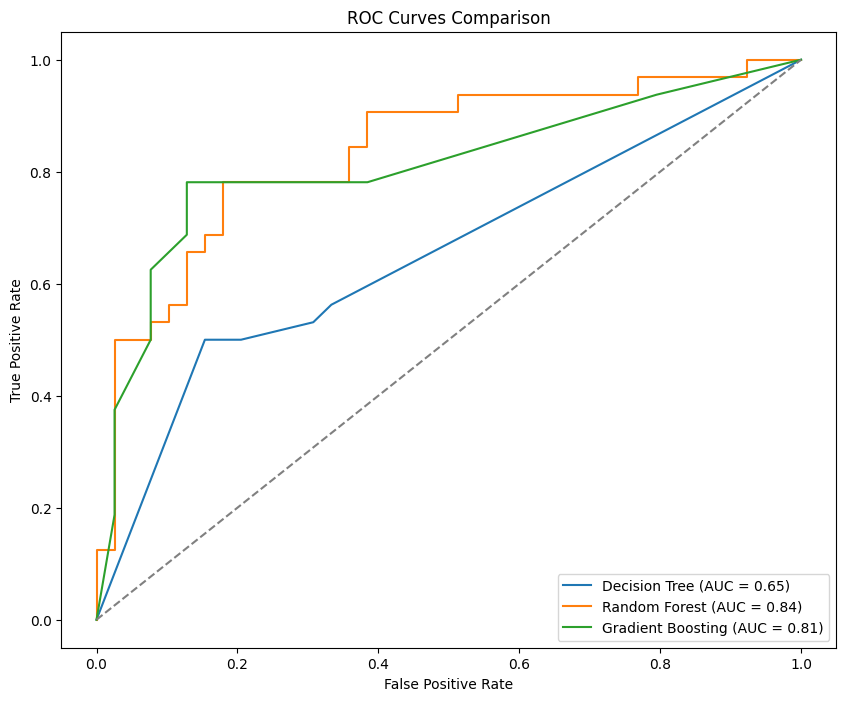

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for model_name, model in best_params.items():
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()